# Fan anomaly detection using spectrogram data

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow_probability as tfp
from tensorflow.keras import backend as K

In [153]:
import sys

sys.path.append("..")
from src import GetCSV
from src import Train_test_sets_maker
from src import MinMaxNormalisation
from src import AnomalyDetector

In [154]:
df_normal, df_abnormal = Get_CSV(['fan'], ['id_02'])

In [155]:
df_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031
1,-18.486190,-10.049236,-13.384350,-16.074200,-13.346490,-11.498096,-11.622952,-12.374533,-14.109491,-12.049542,...,-47.290630,-47.217799,-48.257881,-47.045171,-46.878418,-48.721144,-46.516526,-47.386567,-48.587539,-46.926237
2,-22.059227,-20.656180,-17.338678,-20.584056,-21.447270,-14.766844,-17.684886,-12.498107,-15.217431,-17.010361,...,-37.653296,-34.848146,-34.854337,-35.970748,-36.956571,-34.192015,-35.103304,-34.506845,-37.216001,-38.919832
3,-24.452553,-13.168137,-14.046997,-17.058322,-15.683156,-7.984075,-8.512122,-8.278273,-11.737424,-11.706798,...,-47.929725,-48.868498,-46.345592,-45.761682,-47.386795,-46.551346,-46.181220,-47.188333,-47.428342,-46.355912
4,-24.180545,-19.462500,-22.259749,-24.493075,-18.386713,-18.415031,-22.382152,-19.474670,-18.125735,-19.040538,...,-35.525882,-36.310533,-35.293246,-37.037423,-36.581487,-35.257978,-36.110313,-35.362686,-37.439185,-37.762807
5,-15.014671,-13.608847,-14.216701,-14.262203,-20.844324,-14.812167,-14.899663,-9.363111,-14.668681,-12.243163,...,-46.701486,-46.617710,-46.641490,-45.182792,-45.106829,-46.032977,-46.327486,-47.602591,-43.977550,-44.202665


For good measure, we make sure the spectrogram can be reconstructed from the files. 

In [156]:
train_set, test_set, test_labels = Train_test_sets_maker(df_normal,df_abnormal)

C:\Users\carbo\Documents\MIMII\Notebooks\Train_test_sets_maker.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_test_data['labels'] = [1] * abnormal_data_length


In [157]:
train_set = MinMax_normalisation(train_set)
test_set = MinMax_normalisation(test_set)

In [158]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031
1,0.633211,0.774717,0.718780,0.673666,0.719415,0.750417,0.748323,0.735717,0.706618,0.741168,...,0.150098,0.151320,0.133876,0.154215,0.157012,0.126106,0.163082,0.148489,0.128347,0.156210
4,0.537705,0.616836,0.569921,0.532463,0.634880,0.634405,0.567868,0.616632,0.639257,0.623914,...,0.347419,0.334258,0.351321,0.322067,0.329714,0.351912,0.337617,0.350156,0.315329,0.309901
6,0.583721,0.764860,0.783517,0.779334,0.680250,0.801961,0.710532,0.671348,0.674651,0.664951,...,0.271606,0.273587,0.280779,0.279138,0.319542,0.348508,0.334931,0.349006,0.350210,0.326062
7,0.714508,0.787861,0.619430,0.778787,0.821176,0.767296,0.864881,0.725031,0.776146,0.812781,...,0.263935,0.267101,0.256735,0.263227,0.208377,0.256767,0.269736,0.269728,0.271117,0.235397
9,0.549405,0.533066,0.601240,0.660846,0.669295,0.607434,0.624910,0.706041,0.682454,0.568608,...,0.319848,0.285711,0.274767,0.324937,0.297207,0.294397,0.299811,0.318225,0.306730,0.301332


## Visualize spectrograms

In [159]:
anomalous_test_data = test_set[~test_labels]
abnormal_spec = anomalous_test_data[24:25].to_numpy()
abnormal_spec = abnormal_spec.reshape(64,313)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

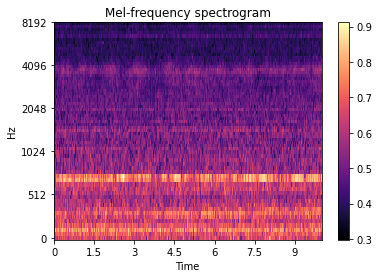

In [160]:
# Spectrogram plot

import librosa
import librosa.display
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
img = librosa.display.specshow(abnormal_spec, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

In [161]:
normal = train_set.iloc[30:31].to_numpy()
normal_spec = normal.reshape(64,313)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

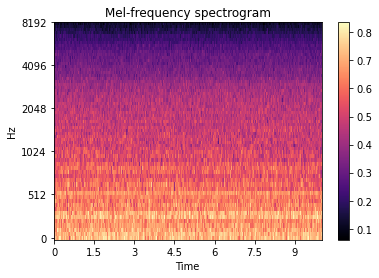

In [162]:
# Spectrogram plot

import librosa
import librosa.display
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
img = librosa.display.specshow(normal_spec, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

## 2) Create model

Use  autoencoder

In [164]:
import keras

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(8, activation="relu"),
    ])
    

    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(20032, activation="linear")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(loss='mse',
                    optimizer='adam')

#convert to tensorflow 
tf_train_set = tf.cast(train_set, tf.float32)
tf_test_set = tf.cast(test_set, tf.float32)

history = autoencoder.fit(tf_train_set, tf_train_set, 
          epochs=50, 
          batch_size=512,
          validation_data=(tf_test_set,tf_test_set),
          shuffle=True)

Epoch 1/50
2/2 [==============================] - 1s 225ms/step - loss: 0.2363 - val_loss: 0.2296
Epoch 2/50
2/2 [==============================] - 0s 105ms/step - loss: 0.1960 - val_loss: 0.1212
Epoch 3/50
2/2 [==============================] - 0s 111ms/step - loss: 0.1050 - val_loss: 0.0538
Epoch 4/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0438 - val_loss: 0.0177
Epoch 5/50
2/2 [==============================] - 0s 111ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 6/50
2/2 [==============================] - 0s 115ms/step - loss: 0.0149 - val_loss: 0.0209
Epoch 7/50
2/2 [==============================] - 0s 109ms/step - loss: 0.0177 - val_loss: 0.0174
Epoch 8/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0153 - val_loss: 0.0134
Epoch 9/50
2/2 [==============================] - 0s 109ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 10/50
2/2 [==============================] - 0s 112ms/step - loss: 0.0098 - val_loss: 0.0082
Epoch 11/50
2/2 [==

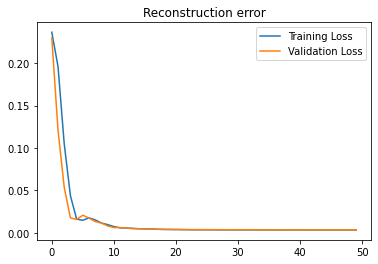

In [165]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Reconstruction error")
plt.legend()

## Visualization on 2D plot of the reconstruction error 

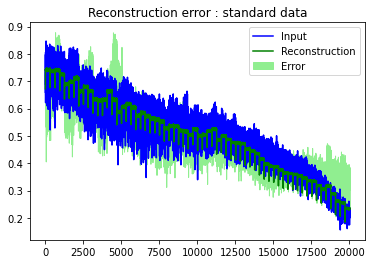

In [166]:
encoded_data = autoencoder.encoder(tf_test_set).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()


plt.clf()
plt.plot(tf_test_set[7], 'b')
plt.plot(decoded_data[7], 'g')
plt.fill_between(np.arange(len(decoded_data[0])), decoded_data[11], tf_test_set[11], color='lightgreen')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("Reconstruction error : standard data")
plt.show()

## Reconstruction of a spectrogram

1/1 [==============================] - 0s 16ms/step


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

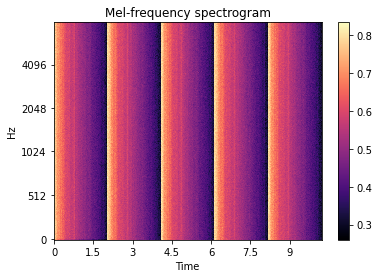

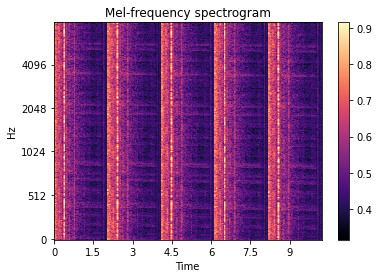

In [73]:
anomalous_test_data = test_set[~test_labels]
anomalous_sample = anomalous_test_data.iloc[13:14].to_numpy()
reconstructions = autoencoder.predict(anomalous_sample)
reconstructions_spectrogram = reconstructions.reshape(309,320)
anomalous_spectrogram = anomalous_sample.reshape(309,320)

import librosa
import librosa.display
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
img = librosa.display.specshow(reconstructions_spectrogram, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

fig, ax = plt.subplots()
img = librosa.display.specshow(anomalous_spectrogram, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

In [78]:
anomalous_spectrogram.shape[1]

320

## Détection des anomalies

Détectez les anomalies en calculant si la perte de reconstruction est supérieure à un seuil fixé. Dans ce didacticiel, vous allez calculer l'erreur moyenne moyenne pour les exemples normaux de l'ensemble d'apprentissage, puis classer les futurs exemples comme anormaux si l'erreur de reconstruction est supérieure à un écart type par rapport à l'ensemble d'apprentissage.

12/12 [==============================] - 0s 5ms/step


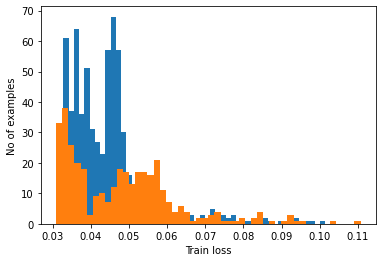

In [167]:
reconstructions = autoencoder.predict(train_set)
train_loss = tf.keras.losses.mae(reconstructions,train_set)

#CB_test_set_bis = CB_train_set_bis.T

anomalous_test_data = test_set[~test_labels]
reconstructions_anomalous = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions_anomalous, anomalous_test_data)


plt.hist(train_loss[None,:], bins=50)
plt.hist(test_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [168]:
anomalous_test_data = test_set[~test_labels]

In [95]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

def lossCalc(model,data):
    reconstructions = model(data)
    return tf.keras.losses.mse(reconstructions,data)

In [150]:
lossValues = lossCalc(autoencoder,tf_test_set)    

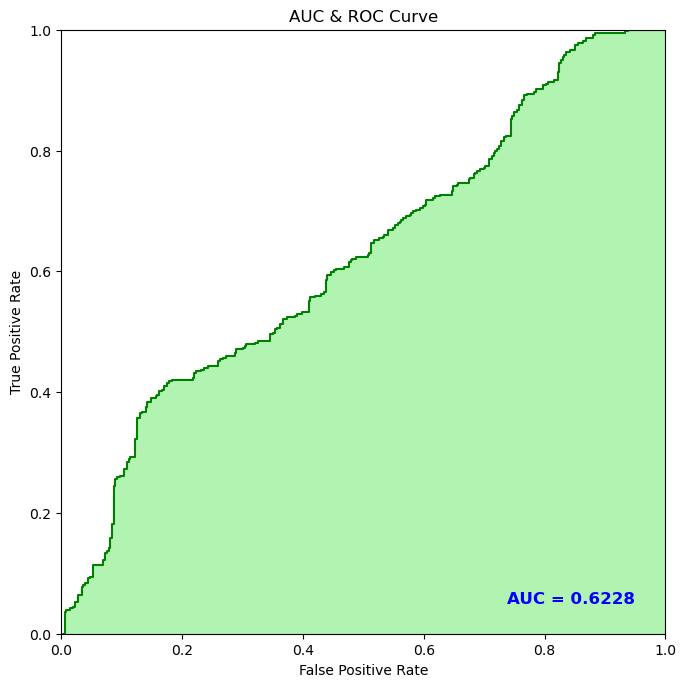

In [176]:
from sklearn import metrics
auc = 1 - metrics.roc_auc_score(test_labels, lossValues)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(~test_labels, lossValues)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [120]:
auc

0.46534539900633265

# Conclusion

L'autoencoder a ce stade n'est pas capable de capturer les anomalies dans le spectrogramme. L'erreur de reconstruction si les données saines et fautives sont les mêmes. 

Le seul pattern qui est mémorisé par l'autoencoder est qu'il y a un gradient d'intensité le long de l'axe en fréquence : basse fréquence = haute valeur et haute fréquence = basse valeur.

Changer la dimension du latent space n'a pas amené une meileur distinction. Après plusieurs essais :
  - Un latent space avec un dimension plus grande (i.e. 1x200) = un 'bruit' qui se rajoute sur le spectrogramme reconstruit
  - Un latent space avec une dimension plus petite (i.e. 1x10) = un gradient de couleur selon l'axe en fréquence très marqué sur le spectrogramme reconstruit


## Piste pour améliorer détection

- Pre-processing : 
    - Utiliser log normalization = permet de rendre la distribution plus "Gaussienne" , ce qui fonctionne mieux avec les NN ($source manquant$)
    - Utiliser Cox-Box normalization = même que log-normalisation
    - Mel filter bank = série de filtres (typiquement une quarantaine) triangulaire qui permettent d'extraire seulement certaines bandes de fréquences. L'idée est d'imiter le comportement non-linéaire de l'oreille humaine. source : https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
    - Utiliser un filtre passe-haut pour enlever une partie des hautes valeurs à basse fréquence.
    - Décorreler les données (peut se faire avec le mel filter bank)
- Modèle :
    - Etudier quelle type d'architechture fonctionne bien pour le problème et les paramètres recommandés (cb de layers, taille des layers, facteur de réduction d'un layer vers un autre.
    - Faire une étude paramétrique sur le latent space
- Metrics:
    - Essayer différente métrique et voir laquelle donne la meilleure détection des anomalies